## 1) Problem Statement 
- Collectively brainstorm and develop innovative solutions to improve the lives of those affected by diabetes

In [6]:
#Import the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [8]:
#load the dataset
data_1 = pd.read_csv(r"C:\Users\wanji\Desktop\african techgirl hackathon\Africantech-Hackathon\diabetes_012_health_indicators_BRFSS2015.csv")

In [9]:
data_2 = pd.read_csv(r"C:\Users\wanji\Desktop\african techgirl hackathon\Africantech-Hackathon\diabetes_binary_5050split_health_indicators_BRFSS2015.csv")


In [10]:
data_3 = pd.read_csv(r"C:\Users\wanji\Desktop\african techgirl hackathon\Africantech-Hackathon\diabetes_binary_health_indicators_BRFSS2015.csv")


In [11]:
data_4 = pd.read_csv(r"C:\Users\wanji\Desktop\african techgirl hackathon\Africantech-Hackathon\diabetes_prediction_dataset.csv")


## 2) Based from the datasets above and the imbalance being addressed two datasets can be used
 - Dataset: diabetes _ 012 _ health _ indicators dataset as a Binary Classification
 - Dataset: Diabetes 50-50 dataset as a Multiclass Binary Classification
 - Dataset: Diabetes_Prediction_Dataset also as  a Multiclass Binary Classification

#### Hence, we can try and pursue any of them separately to get which can be more appropriate and this will be determined by the metrics used and how the models will perform 

### Dataset: Diabetes_Prediction_Dataset

In [12]:
#load the dataset
diabetes_prediction_data = pd.read_csv(r"C:\Users\wanji\Desktop\african techgirl hackathon\Africantech-Hackathon\diabetes_prediction_dataset.csv")
diabetes_prediction_data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### Data Understanding:Understanding the data info in-depth

In [13]:
# Function to know the shape 
def check_dataset_shape(dataset):
    if isinstance(dataset, np.ndarray):
        print("Dataset shape:", dataset.shape)
    elif isinstance(dataset, pd.DataFrame):
        print("Dataset shape:", dataset.shape)
    else:
        print("Invalid dataset type. Please provide a NumPy array or a Pandas DataFrame.")
        
# Assuming you have a dataset named 'sales_data'
check_dataset_shape(diabetes_prediction_data)

Dataset shape: (100000, 9)


In [14]:
#Column and datatypes
# Function to know the info of the datasets
def create_dataset_info(dataset):
    if isinstance(dataset, pd.DataFrame):
        info = dataset.info()
        return info
    else:
        return "Invalid dataset type. Please provide a Pandas DataFrame."
#Dataset named 'diabetes_prediction_data'
dataset_info = create_dataset_info(diabetes_prediction_data)
# Dataset named 'diabetes_prediction_data'
dataset_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
# Statistics of the dataset 
def create_dataset_describe(dataset):
    if isinstance(dataset, pd.DataFrame):
        info = dataset.describe()
        return info
    else:
        return "Invalid dataset type. Please provide a Pandas DataFrame."
#Dataset named 'diabetes_prediction_data'
dataset_info = create_dataset_describe(diabetes_prediction_data)
dataset_info

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


# 3) EDA Analysis 

- We need to understand in-depth given the dataset and this will help us give a better understaning of the data,
 how we can show relationship maybe for example the age and the heart disease/ hypertension or also the bmi as well.
 
 - Also, a deeper understanding to this will help us further understand what can be the target variable" In this case Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes,and also identify the features that can be used, hence showing that all EDA should be in line to the target variable either to show a relationship or mlticollinearity.

#### i) Identify the numerical and categorical columns

##### - Numerical Columns

In [37]:
#Identifying numerical columns
# Function to display all categorical columns
def print_numerical_columns(diabetes_prediction_data ):
    # Find categorical columns
    numerical_columns = diabetes_prediction_data.select_dtypes(include='object').columns

    # Print the column names
    for numerical_cols in numerical_columns:
        print(numerical_columns)

print_numerical_columns(diabetes_prediction_data)

Index(['gender', 'smoking_history'], dtype='object')
Index(['gender', 'smoking_history'], dtype='object')


In [26]:
def plot_numerical(diabetes_prediction_data):
    # Separate numerical and categorical columns
    numerical_columns = diabetes_prediction_data.select_dtypes(include=['int64', 'float64']).columns
    # Plot numerical columns
    for col in numerical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(diabetes_prediction_data[col], kde=True, color='blue')
        plt.title(f'Numerical Column: {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()




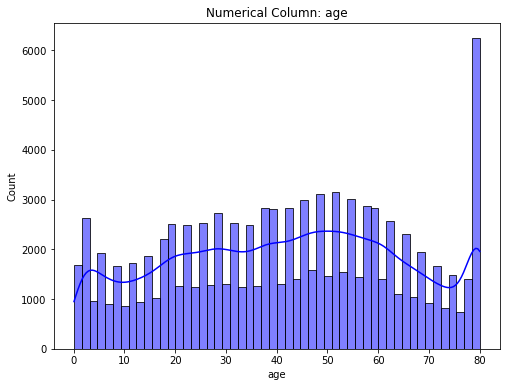

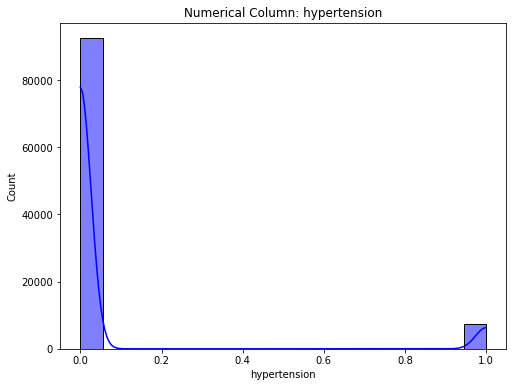

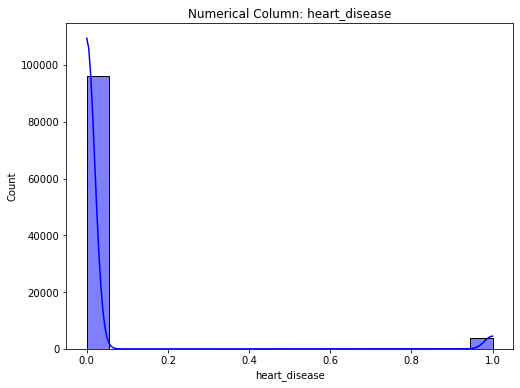

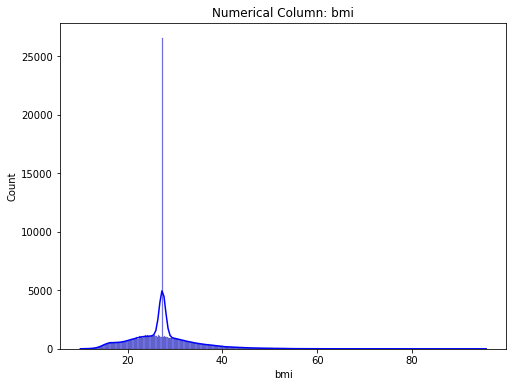

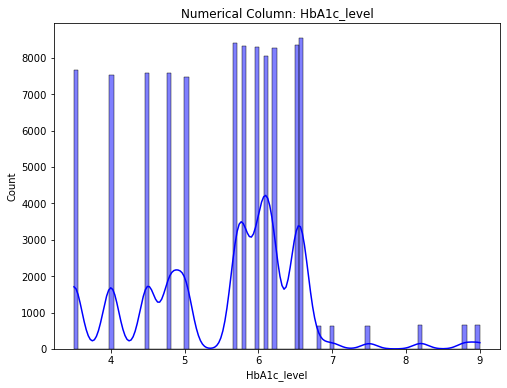

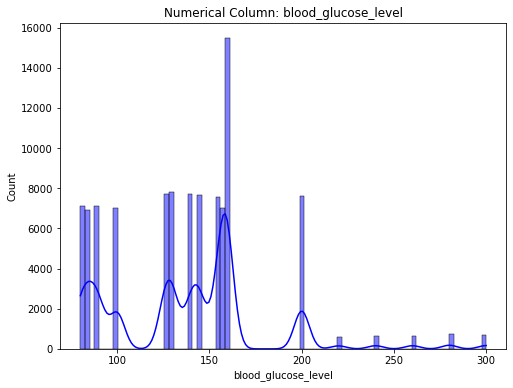

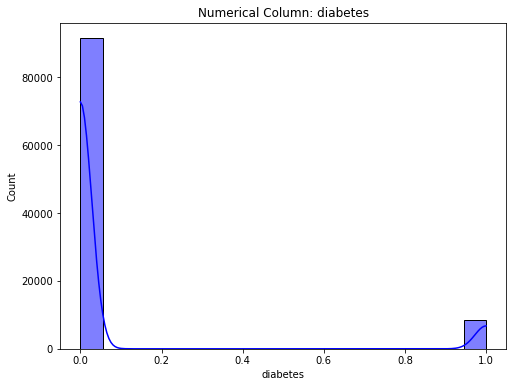

In [27]:
# Assuming you have a DataFrame called 'data'
plot_numerical(diabetes_prediction_data)

##### - Categorical Columns

In [33]:
# Function to display all categorical columns
def print_categorical_columns(diabetes_prediction_data ):
    # Find categorical columns
    categorical_columns = diabetes_prediction_data.select_dtypes(include='object').columns

    # Print the column names
    for column in categorical_columns:
        print(column)

print_categorical_columns(diabetes_prediction_data)

gender
smoking_history


In [30]:
def plot_categorical(diabetes_prediction_data):
    categorical_columns = diabetes_prediction_data.select_dtypes(include=['object']).columns

    # Plot numerical columns
    for col in categorical_columns:
        plt.figure(figsize=(8, 6))
        sns.histplot(diabetes_prediction_data[col], kde=True, color='blue')
        plt.title(f'Categorical Column: {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()


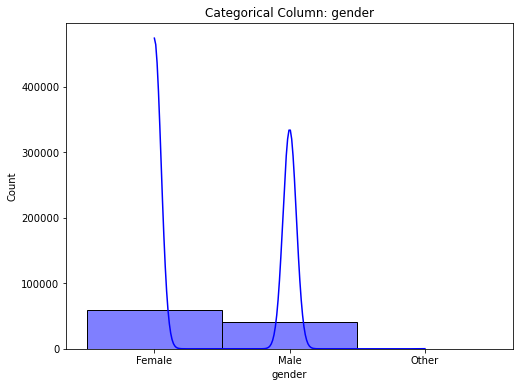

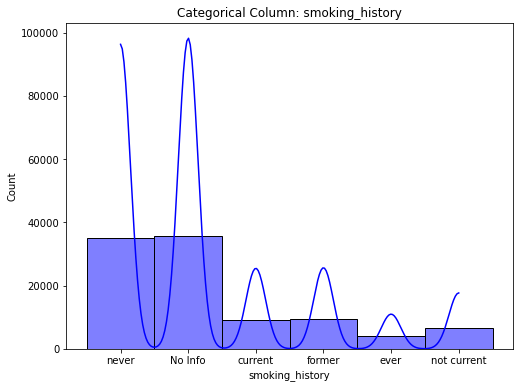

In [31]:
plot_categorical(diabetes_prediction_data)

### ii) Univariate, Bivariate and Multivariate Analysis

- Multivariate Analaysis

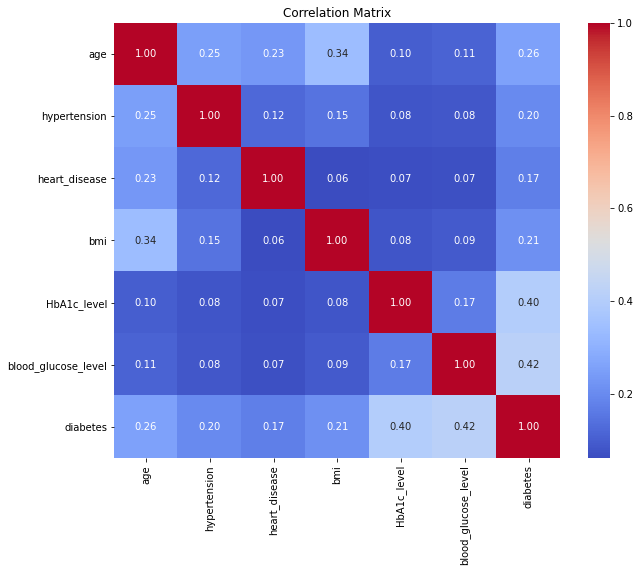

In [38]:

# Multivariate Analysis - Correlation Matrix
correlation_matrix = diabetes_prediction_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


- Univariate Analysis

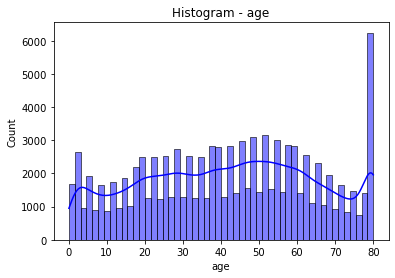

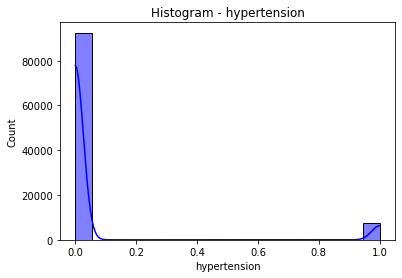

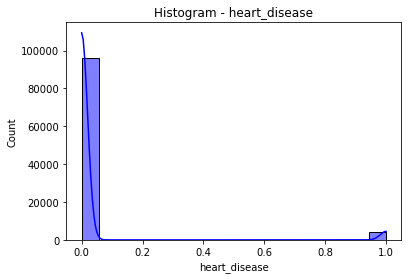

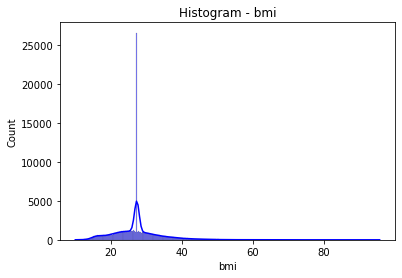

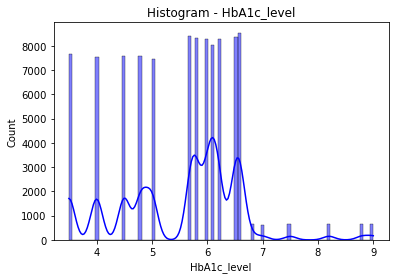

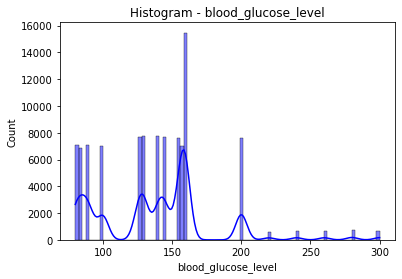

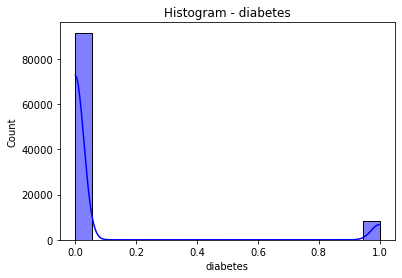

In [39]:
# Univariate Analysis - Histograms for numerical variables
numerical_columns = diabetes_prediction_data.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(diabetes_prediction_data[col], kde=True, color='blue')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

- Bivariate Analysis

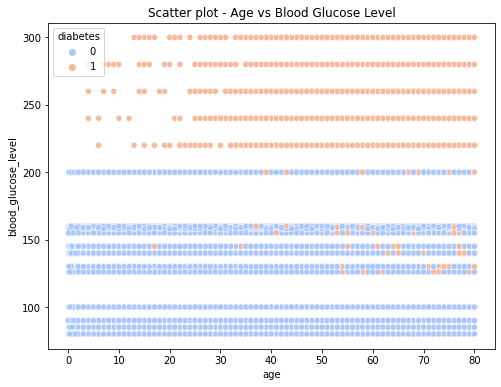

In [42]:
# Bivariate Analysis - Scatter plot of age vs blood glucose level
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='blood_glucose_level', data=diabetes_prediction_data, hue='diabetes', palette='coolwarm')
plt.title('Scatter plot - Age vs Blood Glucose Level')
plt.show()


### iii) Label Encoding

In [ ]:
# Label Encoding - Convert categorical variables to numerical
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Hypertension'] = label_encoder.fit_transform(data['Hypertension'])
data['Heart_Disease'] = label_encoder.fit_transform(data['Heart_Disease'])
data['Smoking'] = label_encoder.fit_transform(data['Smoking'])
data['Diabetes_Status'] = label_encoder.fit_transform(data['Diabetes_Status'])


### iv) Pair plots of the numerical variables

In [ ]:
# Pair Plots - Visualizing multiple numerical variables
sns.pairplot(data[numerical_columns], hue='Diabetes_Status', palette='coolwarm')
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()

### v) Correlation with the Target 

In [ ]:
# Correlation with Target - Correlation of each feature with Diabetes_Status
correlation_with_target = data.corr()['Diabetes_Status'].abs().sort_values(ascending=False)
print("Correlation with Target:")
print(correlation_with_target)

#### For Age we can have them represented in bins/categories

# Data Scrubbing

#### Identifying duplicated values and drop them

In [ ]:
#Function to drop the duplicate 
diabetes_prediction_data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [ ]:
diabetes_prediction_data.drop_duplicates()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### - Identifying missing values 

In [ ]:
# Identify missing values 
#Function to identify missing values 
diabetes_prediction_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

- Given the above observation, there are no missing values as shown